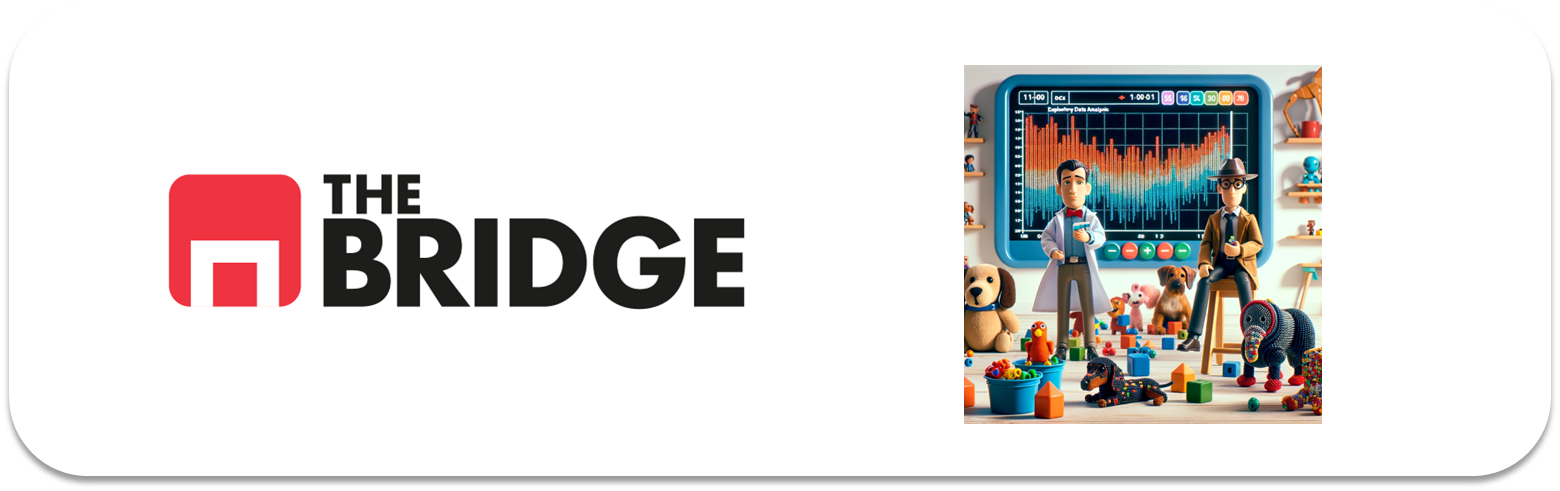

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bcamp


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic= pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic=df_titanic.drop(columns=["deck", "survived", "pclass","embarked"])
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"]=df_titanic["parch"]+df_titanic["sibsp"]
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [5]:
df_titanic=df_titanic.drop(columns=["parch", "sibsp"])
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic["embark_town"]=df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0])

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
df_titanic["age"]=df_titanic["age"].fillna(df_titanic["age"].mean())
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [9]:
df_titanic.columns

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')

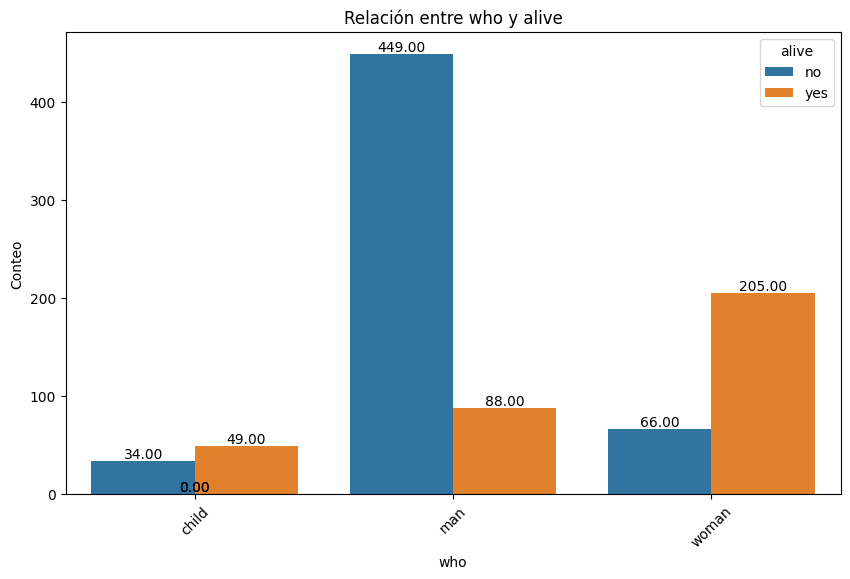

In [30]:
#1
bcamp.plot_categorical_relationship_fin(df_titanic,'who','alive',show_values=True)

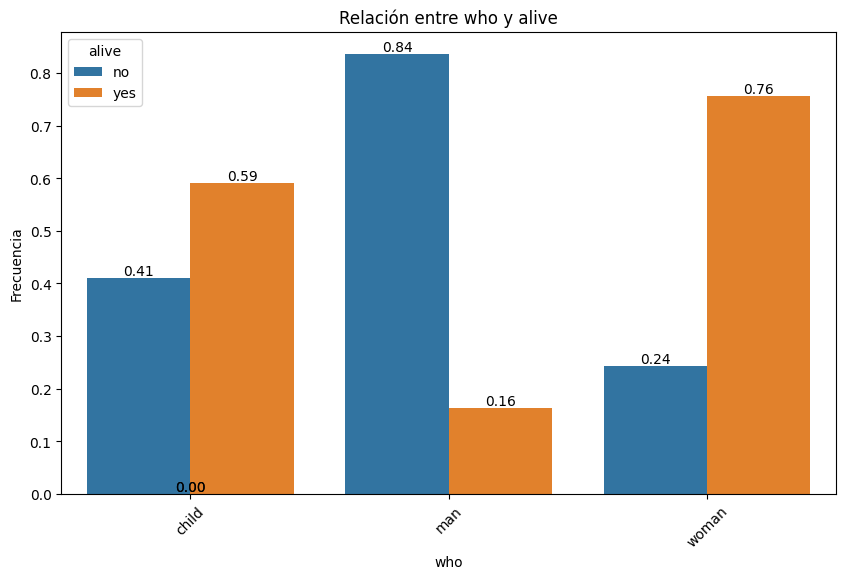

In [31]:
bcamp.plot_categorical_relationship_fin(df_titanic,'who','alive',relative_freq=True,show_values=True)

In [11]:
#Atendiendo a valores absolutos Sobrevivieron mas mujeres que hombres y mas hombres que niños
#En concepto relativo Sobrevivieron mayor porcentaje de mujeres sobre el total de estas, luego irian los niños en indice de supervivencia
#Y por último los hombres que tienen un indice negativo dado que murieron muchos mas de los que sobrevivieron

In [12]:
from scipy.stats import chi2_contingency

In [13]:
tabla_cont= pd.crosstab(df_titanic["sex"],df_titanic["alive"])

In [14]:
chi2,p,dof,expected=chi2_contingency(tabla_cont)
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)
print("expected:",expected)

chi2: 260.71702016732104
p: 1.1973570627755645e-58
dof: 1
expected: [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [15]:
#Según el p-value el cual es cercano a 0 si que existe relacion estadisticamente relevante entre ambas variables categoricas

In [16]:
df_titanic["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [17]:
adulto_nene= []
for valor in df_titanic["who"]:
    if valor=="child":
        adulto_nene.append("child")
    else:
        adulto_nene.append("adult")
df_titanic["adulto_infante"]= adulto_nene

In [18]:
df_titanic["adulto_infante"].value_counts()

adulto_infante
adult    808
child     83
Name: count, dtype: int64

In [19]:
tabla_cont_adulto_infante= pd.crosstab(df_titanic["adulto_infante"],df_titanic["alive"])
chi2_adulto_infante,p_adulto_infante,dof_adulto_infante,expected_adulto_infante=chi2_contingency(tabla_cont_adulto_infante)
print("chi2_adulto_infante:",chi2_adulto_infante)
print("p_adulto_infante:",p_adulto_infante)
print("dof_adulto_infante:",dof_adulto_infante)
print("expected_adulto_infante:",expected_adulto_infante)

chi2_adulto_infante: 15.556993340077092
p_adulto_infante: 8.005497211300105e-05
dof_adulto_infante: 1
expected_adulto_infante: [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


In [20]:
#Según el p-value el cual es cercano a 0 si que existe relacion estadisticamente relevante entre ambas variables categoricas

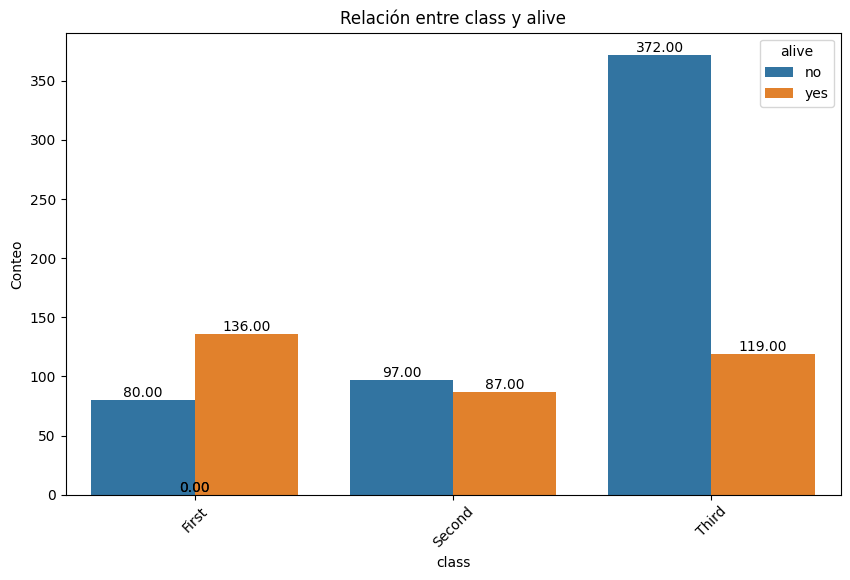

In [28]:
#2
bcamp.plot_categorical_relationship_fin(df_titanic,'class','alive',show_values=True)

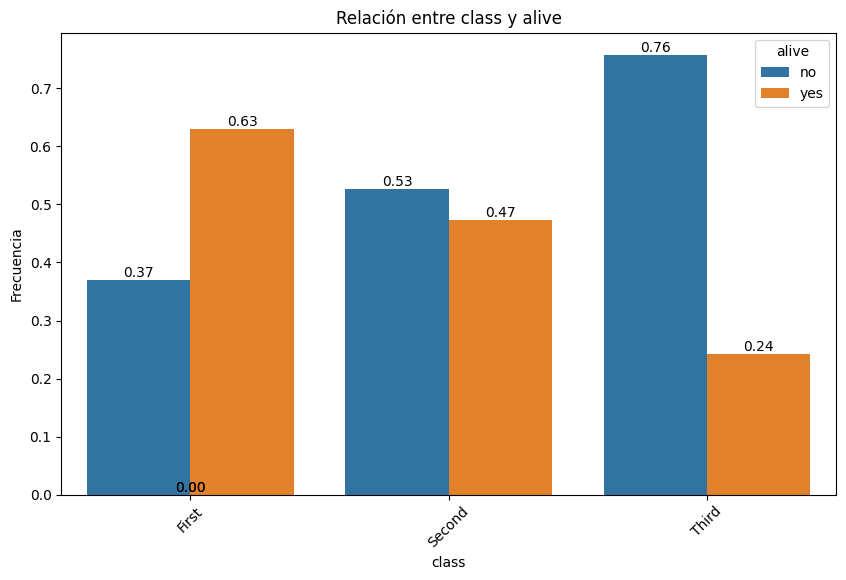

In [29]:
bcamp.plot_categorical_relationship_fin(df_titanic,'class','alive',relative_freq=True,show_values=True)

In [22]:
#Atendiendo a valores absolutos Sobrevivieron mas personas de primera clase que de tercera y mas de tercera que de segunda
#En concepto relativo Sobrevivieron mayor porcentaje personas de primera clase sobre el total de estas, luego irian las personas de segunda en indice de supervivencia 
# aunque ya negativo siendo mas los que murieron que los que sobrevivieron Y por último las personas de tercera clase 
# que también tienen un indice negativo dado que murieron muchos mas de los que sobrevivieron

In [23]:
tabla_cont_clases= pd.crosstab(df_titanic["class"],df_titanic["alive"])
chi2_clases,p_clases,dof_clases,expected_clases=chi2_contingency(tabla_cont_clases)
print("chi2_clases:",chi2_clases)
print("p_clases:",p_clases)
print("dof_clases:",dof_clases)
print("expected_clases:",expected_clases)

chi2_clases: 102.88898875696056
p_clases: 4.549251711298793e-23
dof_clases: 2
expected_clases: [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [24]:
#Según el p-value el cual es cercano a 0 si que existe relacion estadisticamente relevante entre ambas variables categoricas

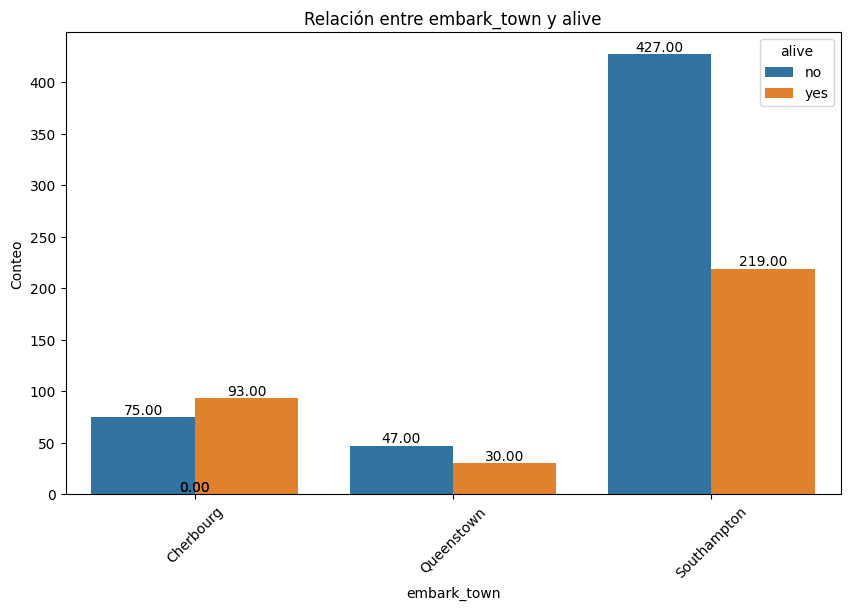

In [26]:
#3
bcamp.plot_categorical_relationship_fin(df_titanic,'embark_town','alive',show_values=True)

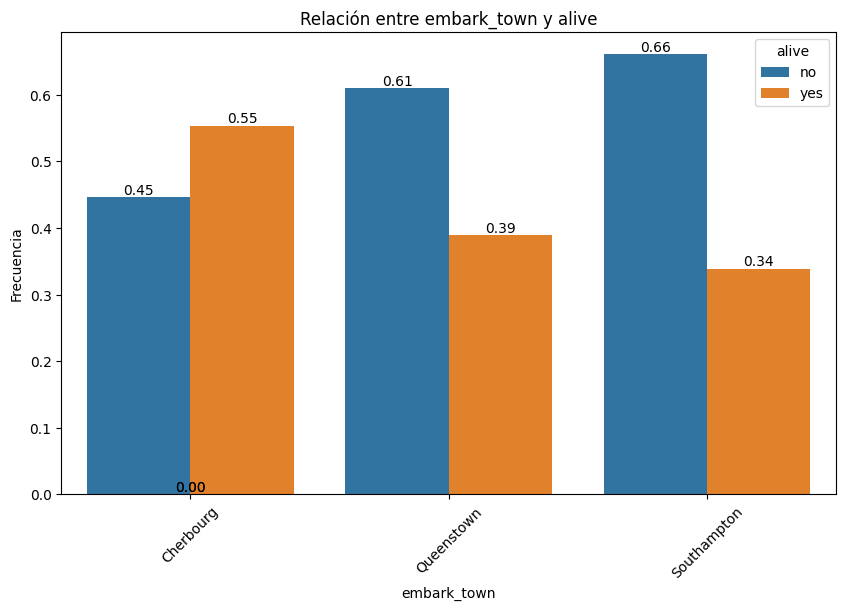

In [27]:
bcamp.plot_categorical_relationship_fin(df_titanic,'embark_town','alive',relative_freq=True,show_values=True)

In [ ]:
#Supervivencia por ciudad de embarque en valores absolutos:
# 1. Southampton 2. Cherbourg 3. Queenstown
#Supervivencia por ciudad de embarque en valores relativos:
# 1. Cherbourg 2. Queenstown 3. Southampton
#De southhampton sobrevivieron mas personas pero porque eran un grupo mayor, sin embargo porcentualmente fueron el grupo con menos supervivientes.

In [32]:
tabla_cont_ciudad= pd.crosstab(df_titanic["embark_town"],df_titanic["alive"])
chi2_ciudad,p_ciudad,dof_ciudad,expected_ciudad=chi2_contingency(tabla_cont_ciudad)
print("chi2_ciudad:",chi2_ciudad)
print("p_ciudad:",p_ciudad)
print("dof_ciudad:",dof_ciudad)
print("expected_ciudad:",expected_ciudad)

chi2_ciudad: 25.964452881874784
p_ciudad: 2.3008626481449577e-06
dof_ciudad: 2
expected_ciudad: [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


In [ ]:
#Según el p-value el cual es cercano a 0 si que existe relacion estadisticamente relevante entre ambas variables categoricas

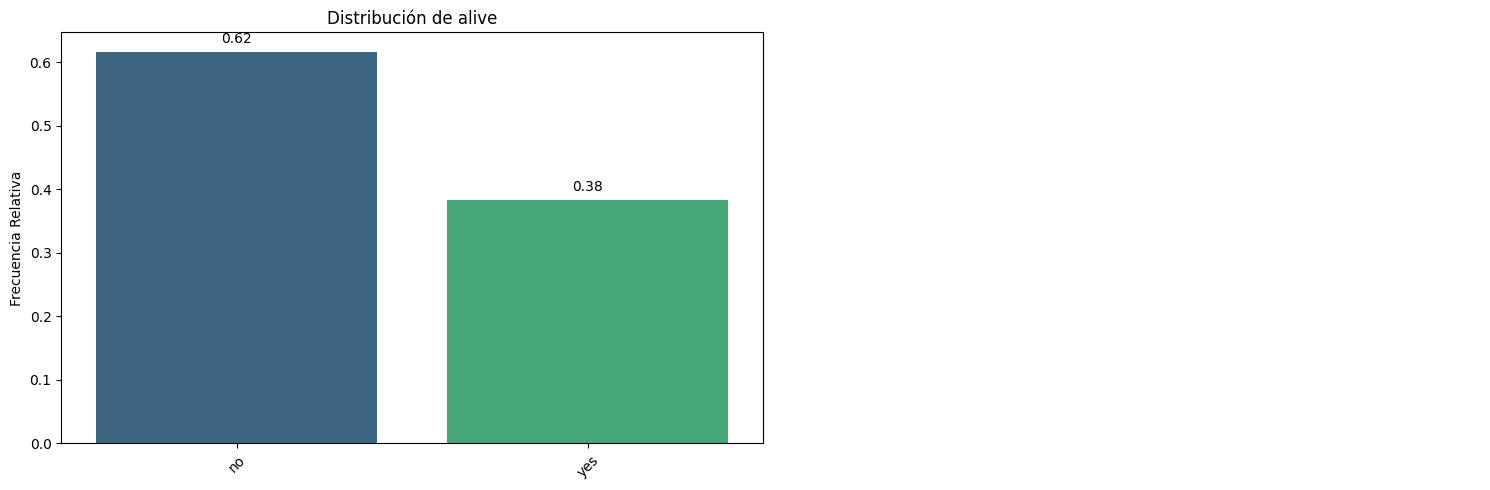

In [35]:
#4
bcamp.pinta_distribucion_categoricas(df_titanic,["alive"],relativa=True,mostrar_valores=True)

(2,)


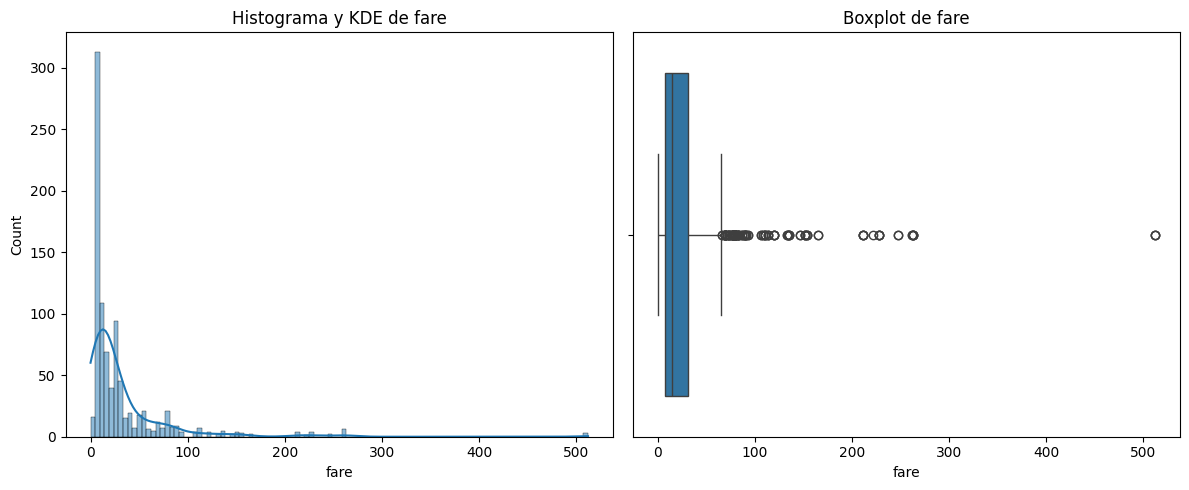

In [36]:
bcamp.plot_combined_graphs(df_titanic,["fare"])

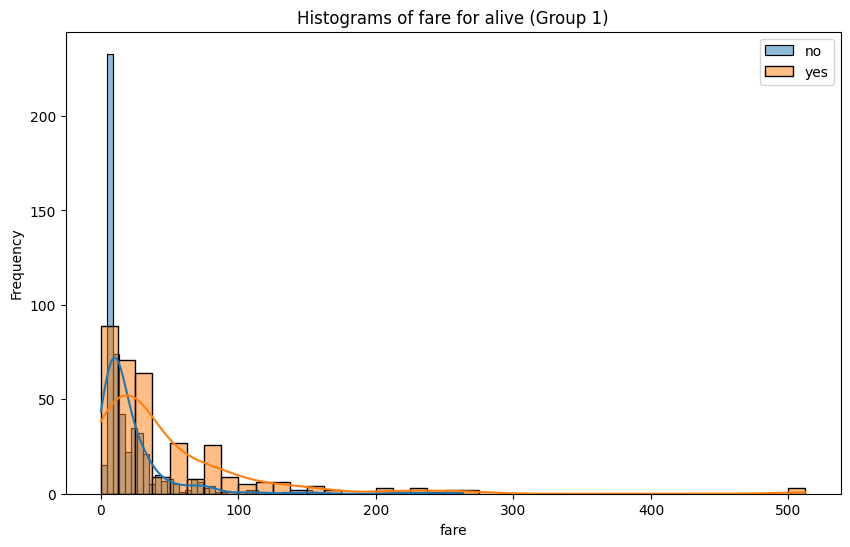

In [38]:
bcamp.plot_grouped_histograms(df_titanic,"alive","fare",group_size=2)

In [ ]:
#Distribución similar en el si y el no puede significar que no tienen relacion ambas columnas.

In [46]:
grupo_a = df_titanic.loc[df_titanic["alive"] == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic["alive"] == "no"]["fare"]

In [49]:
from scipy.stats import mannwhitneyu

In [50]:
u_stat, p_valor =  mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [ ]:
#hay confianza estadística en que las medianas de cada grupo son diferentes para cada valor y que
# por lo tanto hay una relación entre la supervivencia y el precio del billete.

In [55]:
#5
pasagero_caro=df_titanic[df_titanic["fare"] == df_titanic["fare"].max()]
pasagero_caro[["fare","who","alive"]]

,fare,who,alive
258,512.3292,woman,yes
679,512.3292,man,yes
737,512.3292,man,yes


In [ ]:
#Los Pasageros que más pagaron sobrevivieron

In [56]:
pasageros_gratis=df_titanic[df_titanic["fare"] == 0]
pasageros_gratis

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adulto_infante
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,adult
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,adult
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0,adult
277,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0,adult
413,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adult
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,adult
633,male,29.699118,0.0,First,man,True,Southampton,no,True,0,adult


In [ ]:
#Los pasageros que no pagaron es posible que no lo hiceran porque trabajaban como tripulantes, debido a que eras todos hombres y sin familiares a bordo.
#Es solo una suposición, también es posible que se registrara mal el dato del precio del billete o que fueran invitados.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

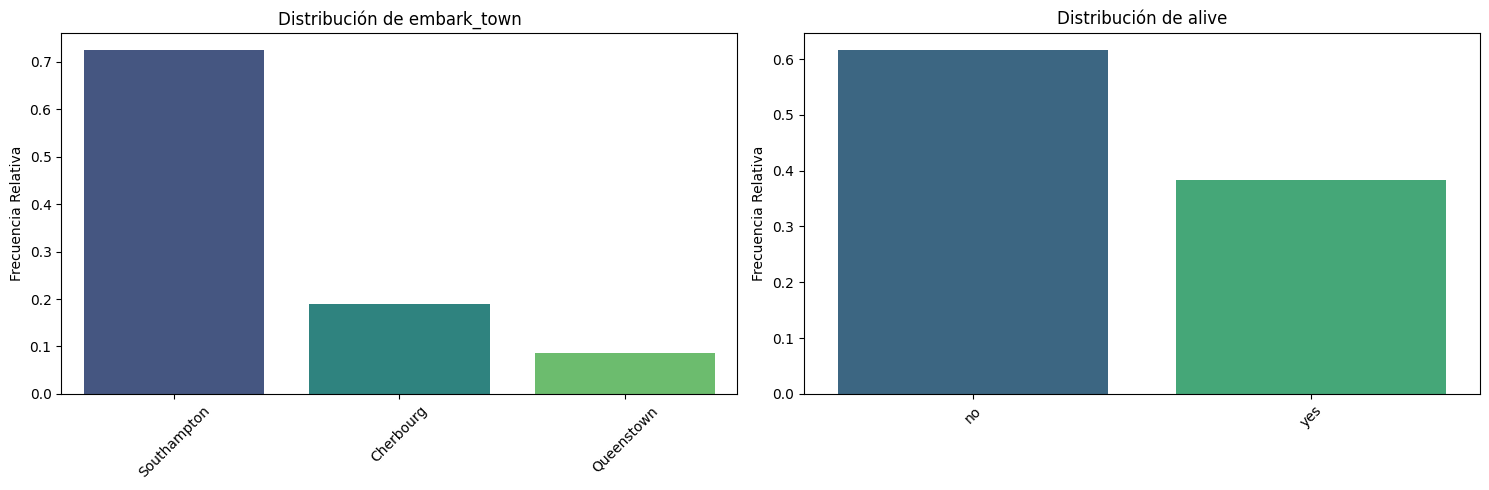

In [59]:
#6
bcamp.pinta_distribucion_categoricas(df_titanic,["embark_town","alive"],relativa=True)

In [70]:
columnas = ["alive","fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


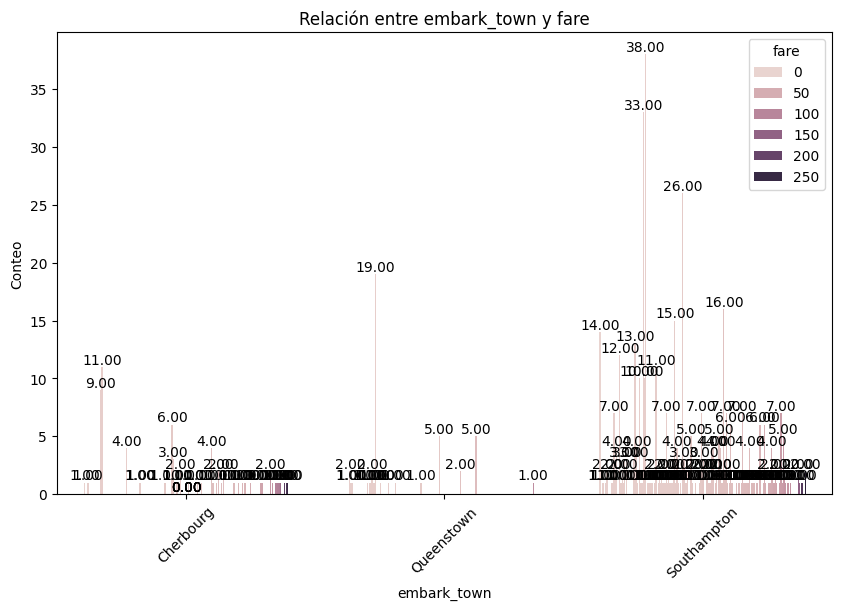

Respuesta yes:


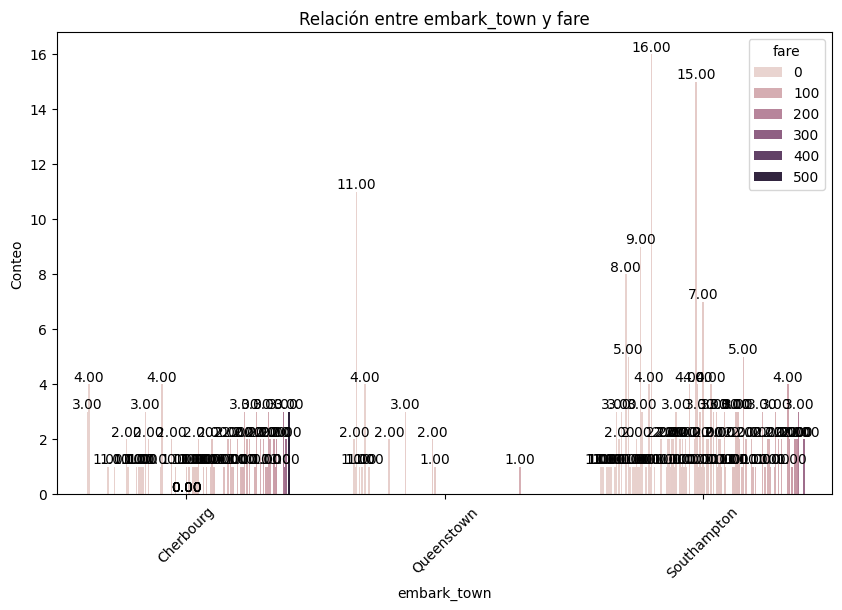

In [73]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bcamp.plot_categorical_relationship_fin(df_datos,col_2,col_1,show_values= True)

In [77]:
#7 
columnas = ["alive","age","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


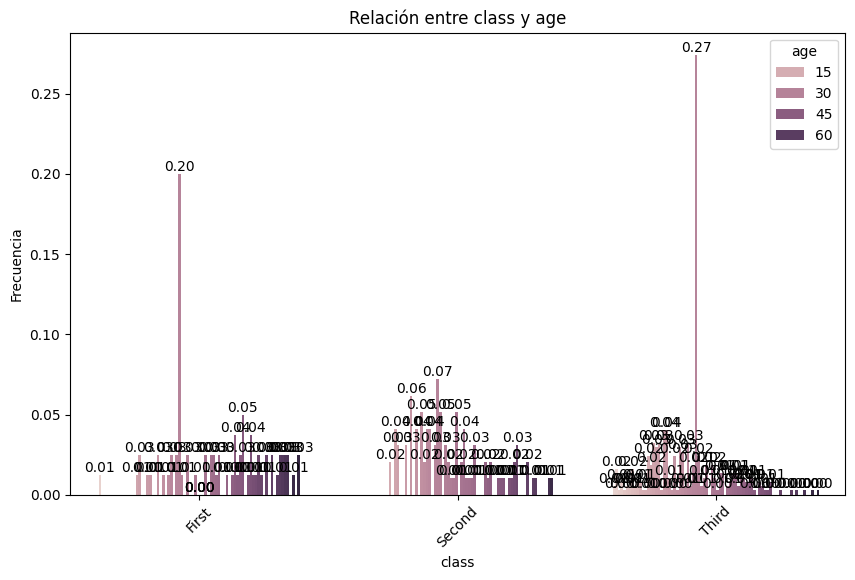

Respuesta yes:


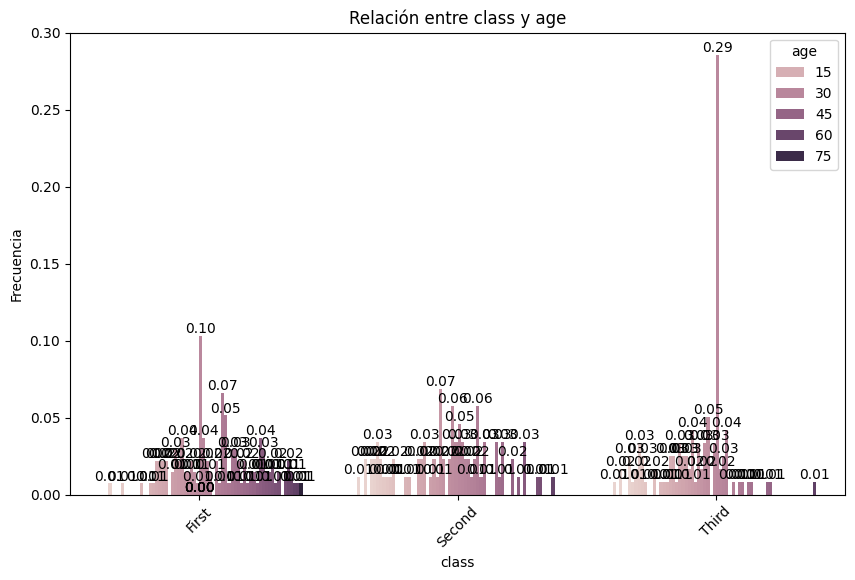

In [79]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bcamp.plot_categorical_relationship_fin(df_datos,col_2,col_1,relative_freq=True,show_values= True)

In [80]:
#8 
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


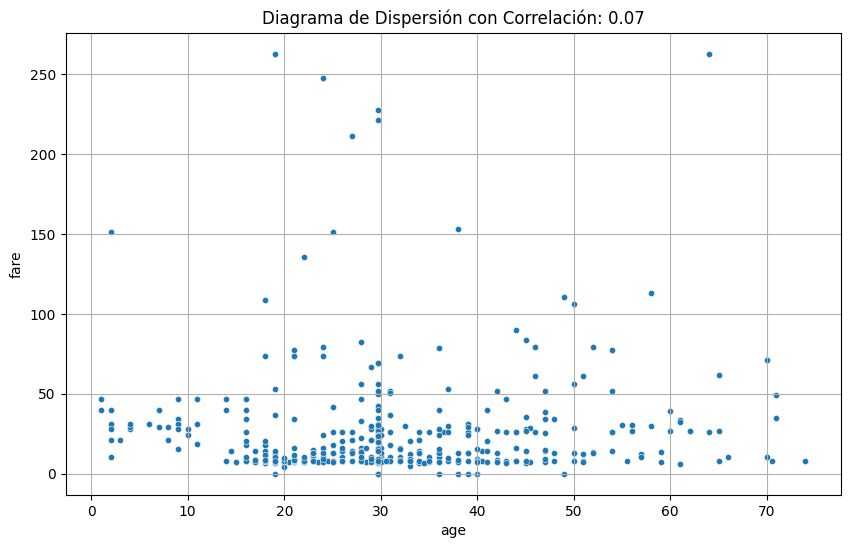

Respuesta yes:


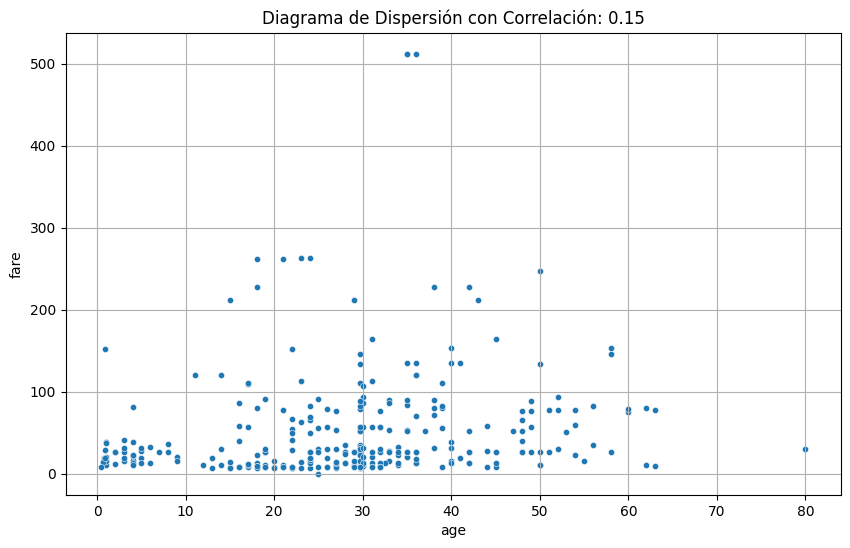

In [81]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bcamp.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [82]:
df_air_jun= pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


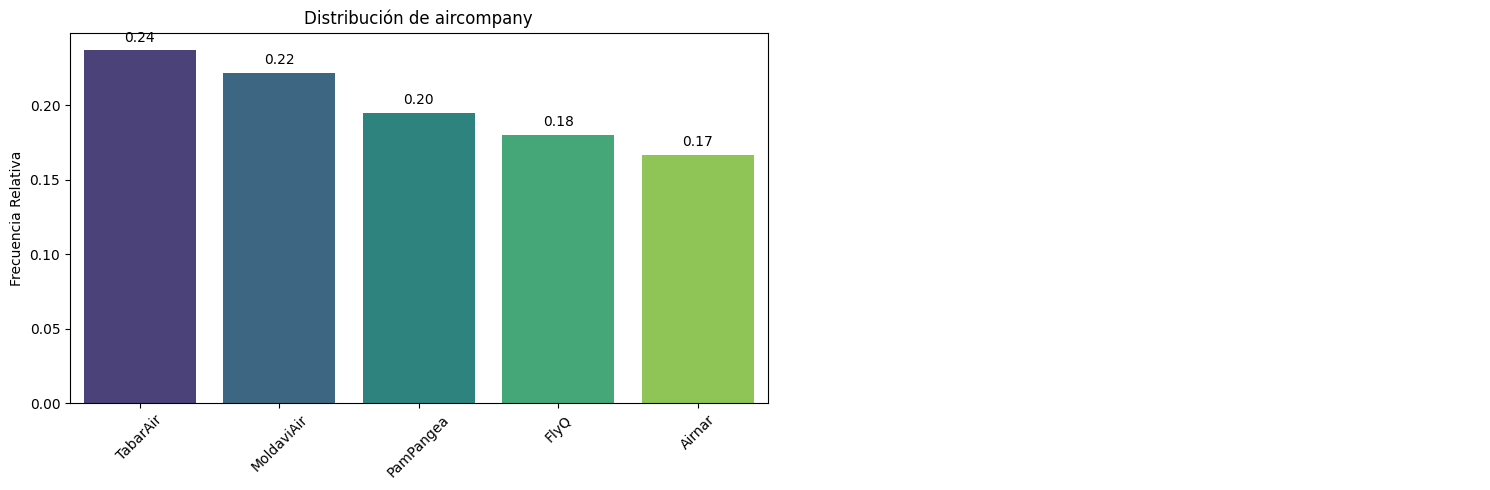

In [84]:
bcamp.pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

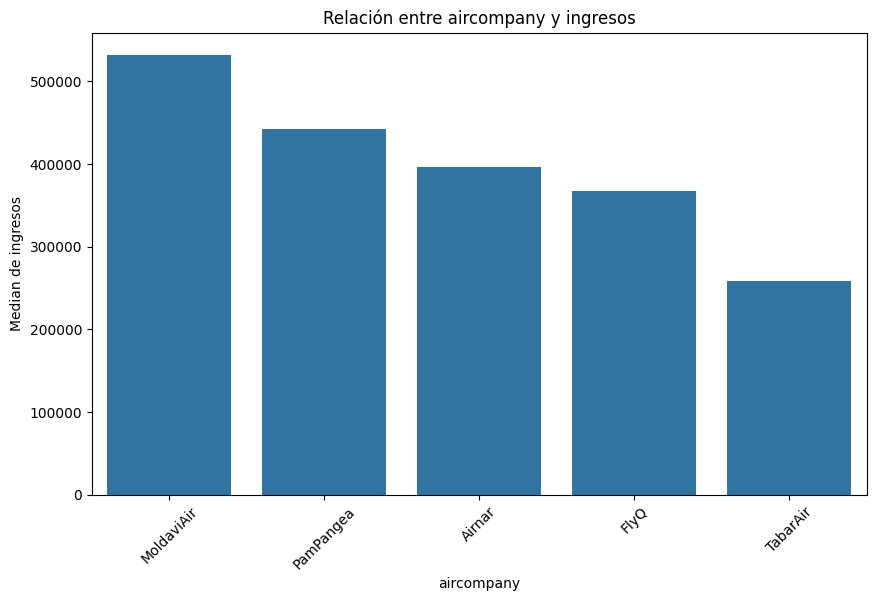

In [85]:
bcamp.plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median")

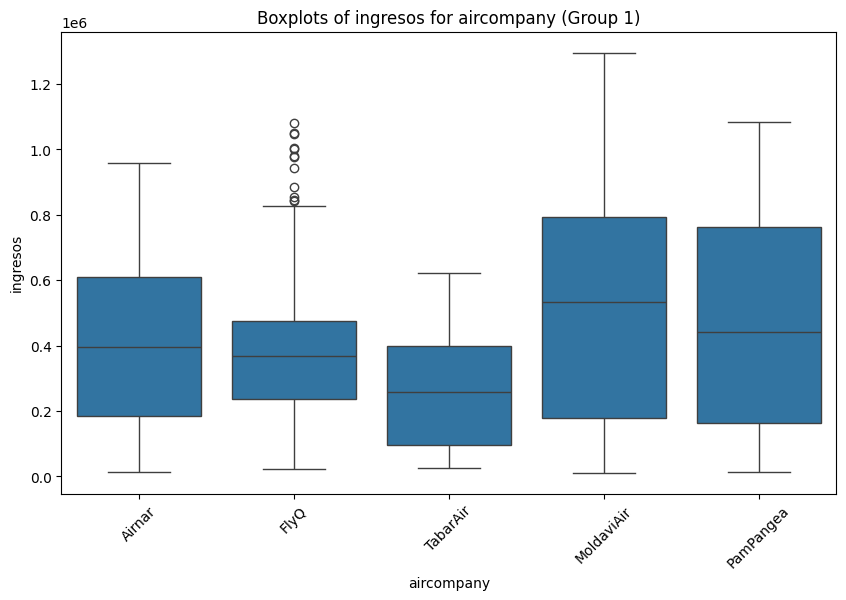

In [87]:
bcamp.plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

In [ ]:
#llama la atención tenga el mayor numero de vuelos y el menor numero de ingresos.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [88]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] 

Respuesta Airnar:


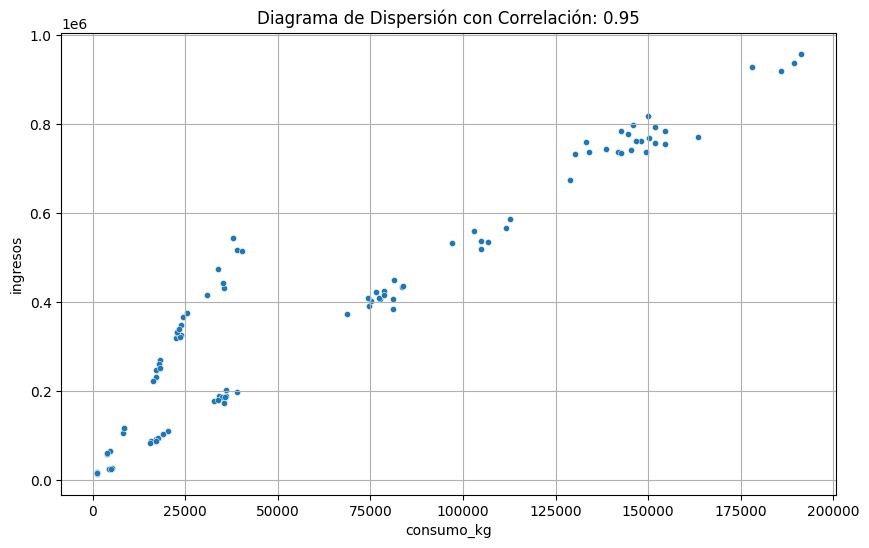

Respuesta FlyQ:


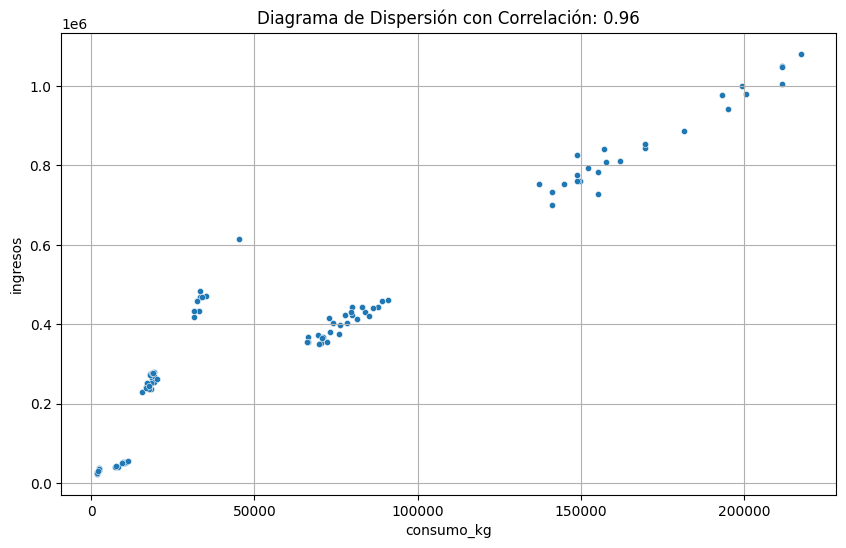

Respuesta TabarAir:


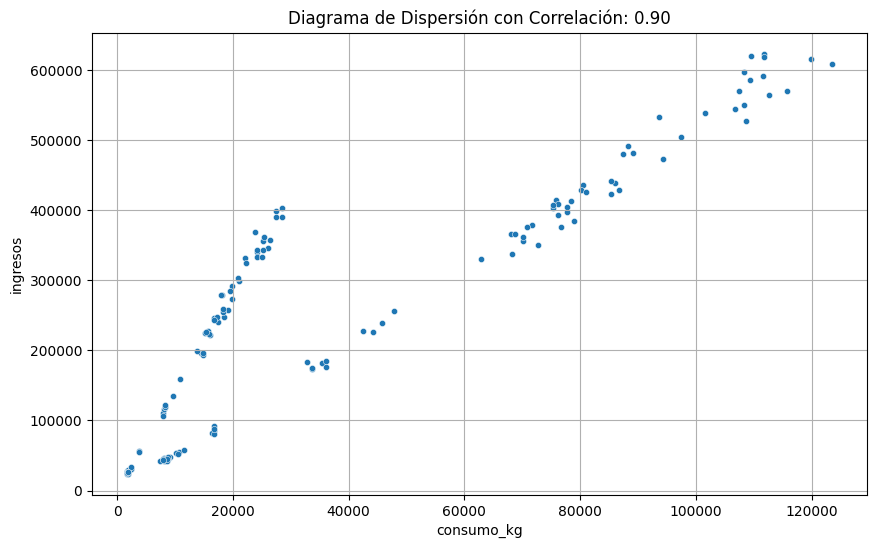

Respuesta MoldaviAir:


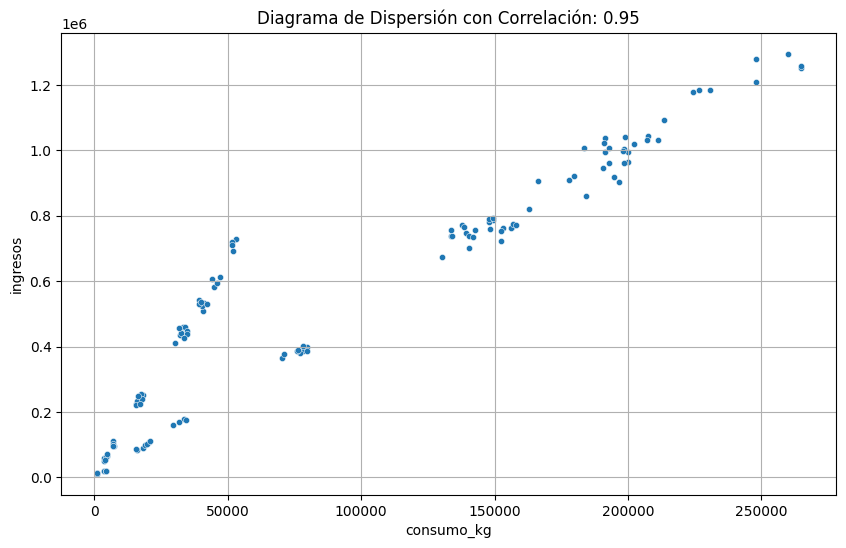

Respuesta PamPangea:


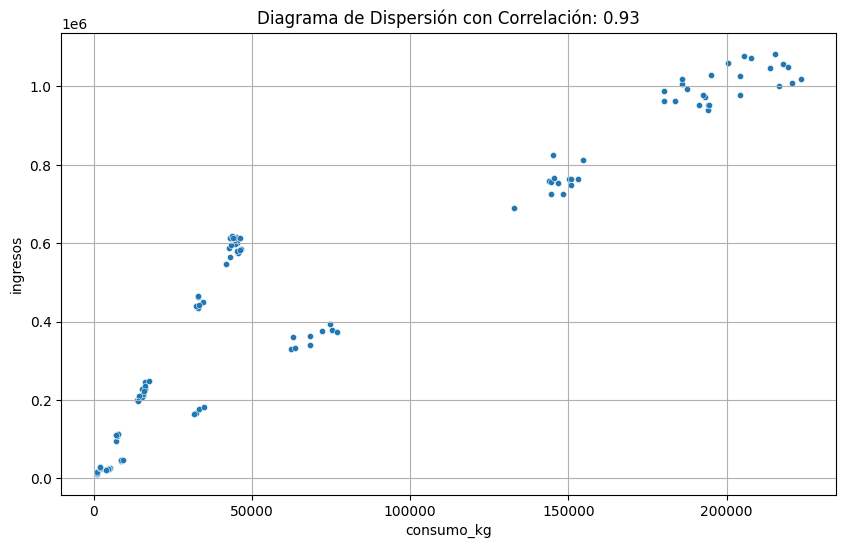

In [89]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bcamp.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [ ]:
#Parece que los vuelos con menor consumo son mas eficientes, se gana mas por cada kilo consumido, 
# lo que puede hacer que TabarAir sea mas rentable de lo que parecía en un principio, por los ingresos por vuelo.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

<Axes: >

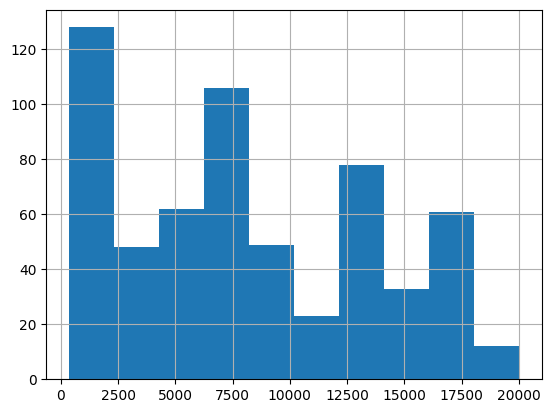

In [90]:
df_air_jun["distancia"].hist()

In [91]:
def categorizar_distancias(valor):
    if valor<5000:
        return "distancia corta"
    elif valor<10000:
        return "distancia media corta"
    elif valor<15000:
        return "distancia media larga"
    elif valor<20000:
        return "distancia larga"

In [92]:
df_air_jun["cat_vuelo"]= df_air_jun["distancia"].apply(categorizar_distancias)

In [94]:
df_air_jun["cat_vuelo"].value_counts()

cat_vuelo
distancia media corta    204
distancia corta          176
distancia media larga    114
distancia larga           94
Name: count, dtype: int64

In [95]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] 

Respuesta distancia corta:


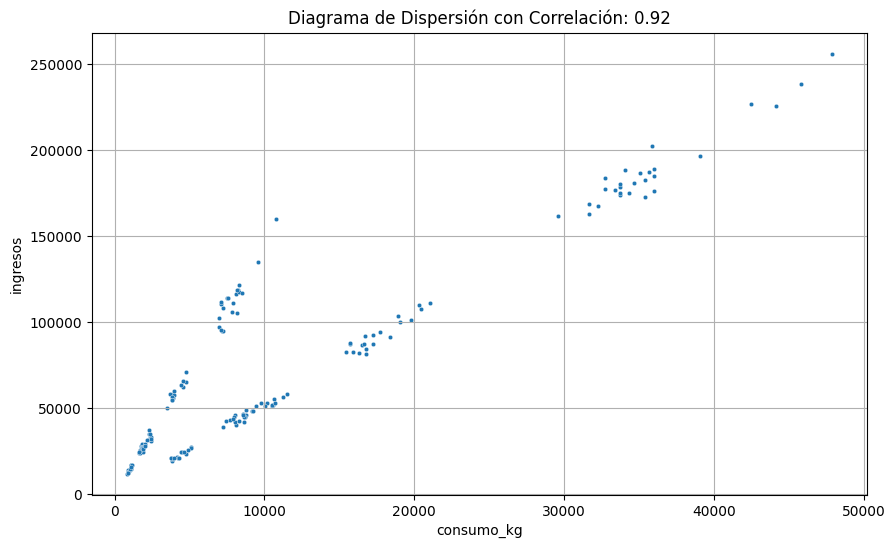

Respuesta distancia media larga:


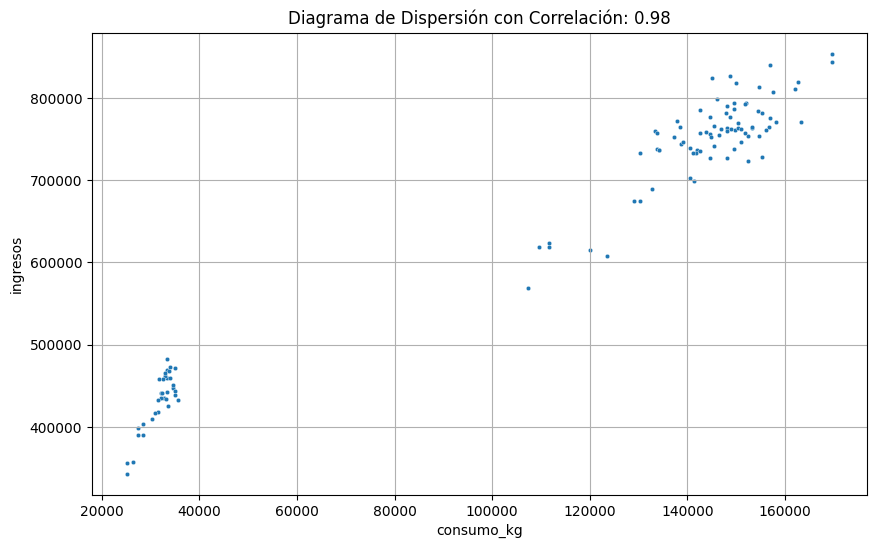

Respuesta distancia media corta:


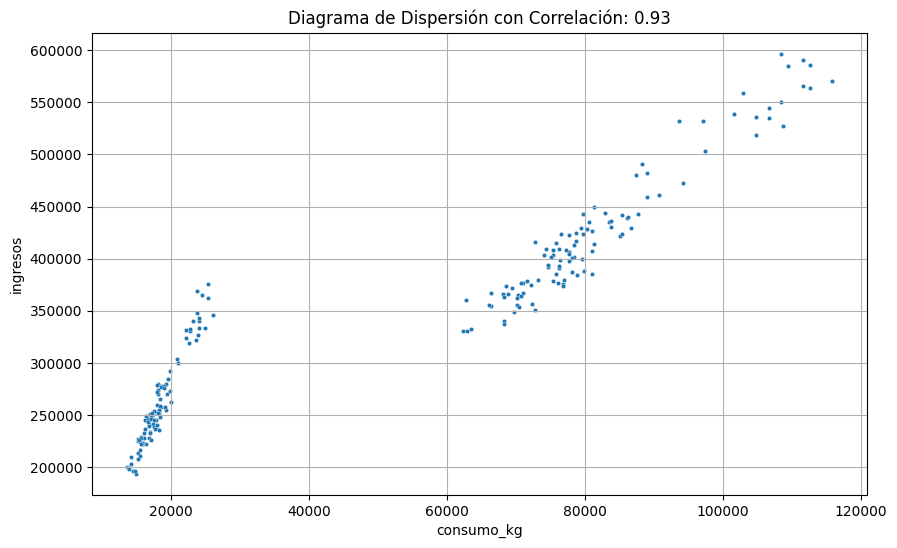

Respuesta None:


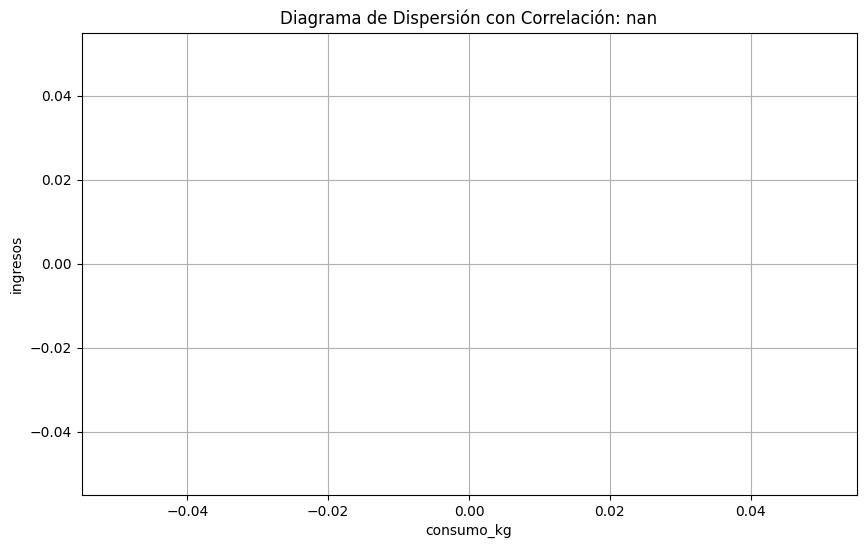

Respuesta distancia larga:


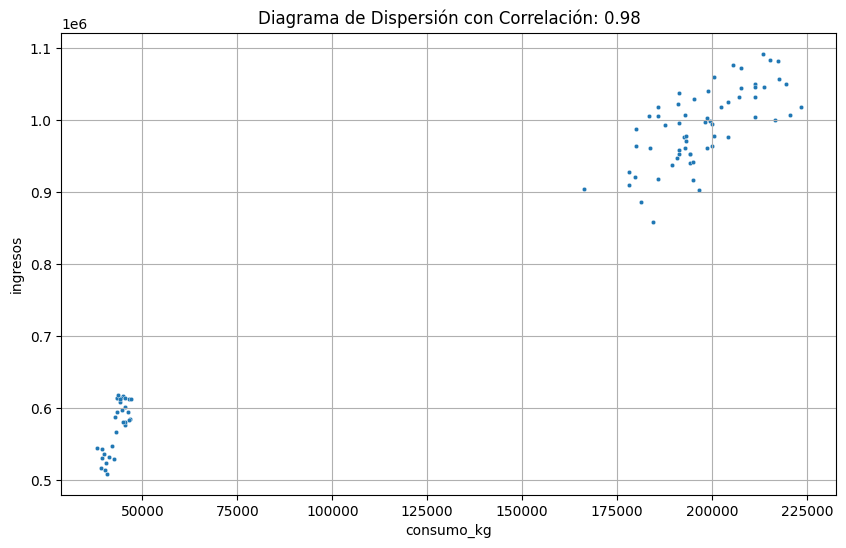

In [97]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bcamp.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=10, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.